In [1]:
# Importing Essential Libraries
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SIZE = 227 # Size of the images in pixel

In [3]:
BATCH_SIZE = 64 # Total no. of images to be present in a single batch

In [4]:
ds=tf.keras.preprocessing.image_dataset_from_directory(
    'Detection',image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE,shuffle=True) 
# Loads and stores all the images into the dataset

Found 40000 files belonging to 2 classes.


In [5]:
class_names=ds.class_names
class_names
# File names found in the directory

['Negative', 'Positive']

In [6]:
len(ds) #Total no. of batches 

625

In [7]:
for image_batch,label_batch in ds.take(1):
    print(image_batch.shape) # Gives batch size, image size and no. of RGB channels
    print(label_batch.numpy()) # To convert into numbers

(64, 227, 227, 3)
[1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1]


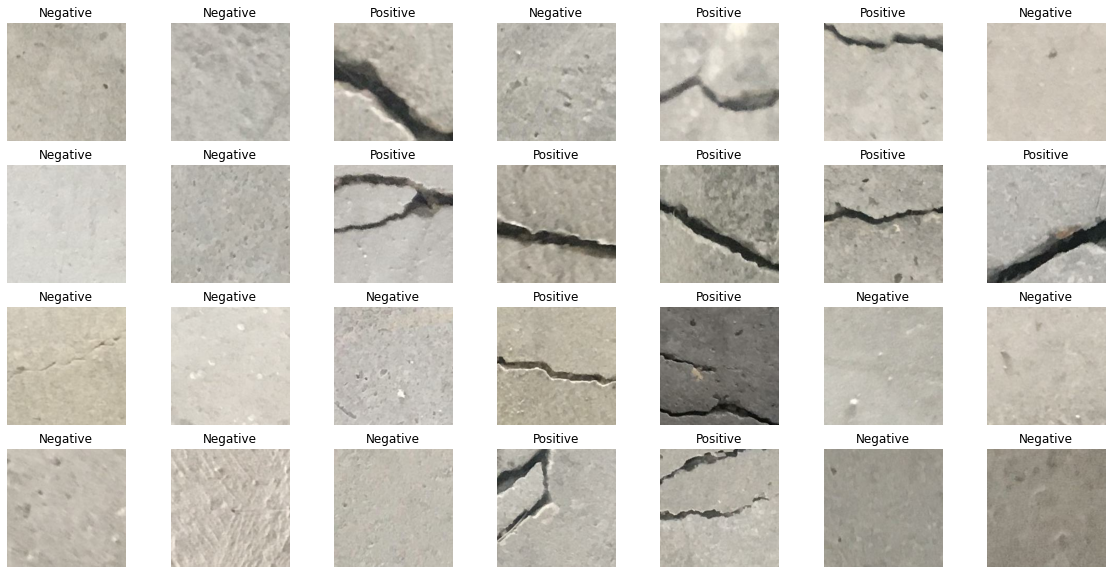

In [22]:
# Dataset Visualization

plt.figure(figsize=(20,10)) #For proper allignment
for image_batch, label_batch in ds.take(1):
    for i in range(28):
        ax=plt.subplot(4,7,i+1) #Required to view multiple images
        plt.imshow(image_batch[i].numpy().astype("uint8")) # Displays data as a image
        plt.title(class_names[label_batch[i]]) # Provides corresponding titles 
        plt.axis("off")

In [23]:
# Resizing and Rescaling
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255)
])


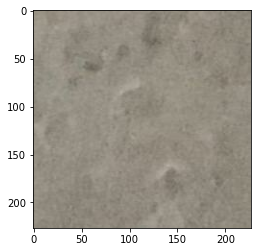

In [24]:
result = resize_and_rescale(image_batch[i])
F_result= plt.imshow(result) # Visualizing the result


In [25]:
# Random FLip and Random Rotation
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"), 
  layers.RandomRotation(0.2), 
]) 

In [26]:
image = tf.expand_dims(image_batch[1], 0) #Random first image

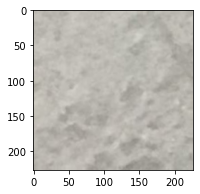

In [33]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in ds.take(1):
    for i in range(1):
      augmented_image = data_augmentation(image)
      ax = plt.subplot(3, 2, i + 1)
      plt.imshow(augmented_image[0].numpy().astype("uint8"))   

In [34]:
# Comparing the augmented image with the original image
def visualize(original, augmented):
  fig = plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original.numpy().astype("uint8"))

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented.numpy().astype("uint8"))

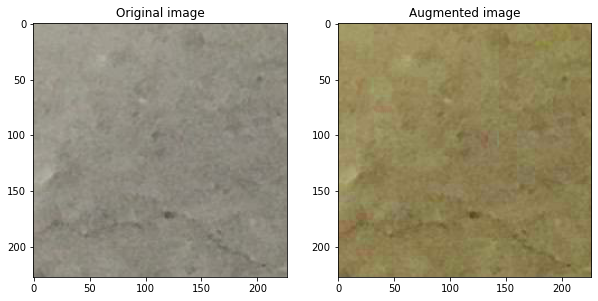

In [35]:
# Saturation 
saturated = tf.image.adjust_saturation(image_batch[1], 4) 
visualize(image_batch[1], saturated)

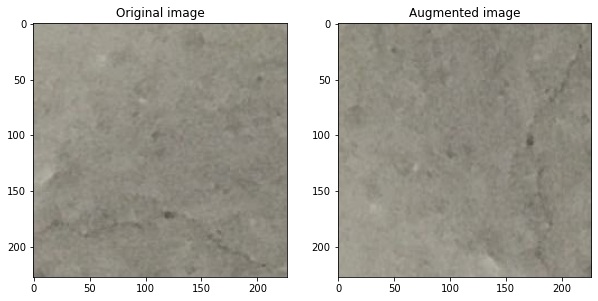

In [36]:
rotated = tf.image.rot90(image_batch[1])
visualize(image_batch[1], rotated)

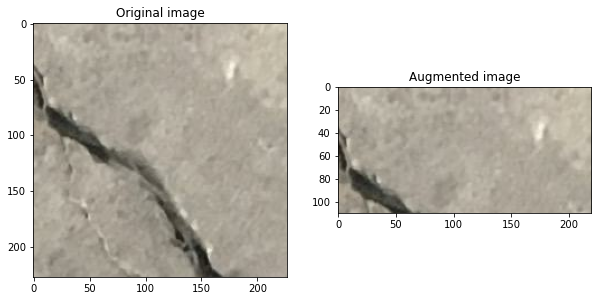

In [37]:
# Random Crop
for i in range(1):
    seed = (i, 0) 
    stateless_random_crop = tf.image.stateless_random_crop(image_batch[2], size=[110, 220, 3], seed=seed)
    visualize(image_batch[2], stateless_random_crop) 

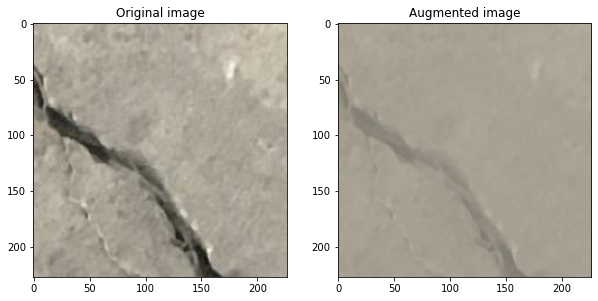

In [39]:
# Random contrast
for i in range(1):
  seed = (i, 0)  
  stateless_random_contrast = tf.image.stateless_random_contrast(
      image_batch[2], lower=0.1, upper=0.9, seed=seed)
  visualize(image_batch[2], stateless_random_contrast)